*Import the libraries*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import pickle

*Load the data*

In [2]:
data = pd.read_csv("glass.csv")
data.head()

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Glass_Type
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


*Checking data type of each column*

In [22]:
d= data.dtypes
print(d)

Id              int64
RI            float64
Na            float64
Mg            float64
Al            float64
Si            float64
K             float64
Ca            float64
Ba            float64
Fe            float64
Glass_Type      int64
dtype: object


*Shape of the data*

In [4]:
data.shape

(214, 11)

*Understand the data*

In [5]:
print("Are there any null values??")
data.isnull().sum()

Are there any null values??


Id            0
RI            0
Na            0
Mg            0
Al            0
Si            0
K             0
Ca            0
Ba            0
Fe            0
Glass_Type    0
dtype: int64

*Dropping unwanted columns*

In [3]:
data = data.drop(['Id'], axis=1)
data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Glass_Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


*Assigning o/p to the designated glass type*

In [4]:
types= {'1':'building_windows_float_processed',
'2': "building_windows_non_float_processed",
'3': "vehicle_windows_float_processed",
'4': "vehicle_windows_non_float_processed",
'5': "containers",
'6': "tableware",
'7': "headlamps"
}

*Features & Target*

In [5]:
features = data.drop(['Glass_Type'], axis=1)
target = data['Glass_Type']
print("--------------------- FEATURES ---------------------")
print(features.head())
print(" ")
print("---- TARGET ----")
print(target.head())

--------------------- FEATURES ---------------------
        RI     Na    Mg    Al     Si     K    Ca   Ba   Fe
0  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0
1  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0
2  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0
3  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0
4  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.0
 
---- TARGET ----
0    1
1    1
2    1
3    1
4    1
Name: Glass_Type, dtype: int64


*Feature Scaling*

In [6]:
scaler = MinMaxScaler()
new_features = scaler.fit_transform(features)
print("-------------------------- NEW FEATURES ------------------------")
print(new_features)


-------------------------- NEW FEATURES ------------------------
[[0.43283582 0.43759398 1.         ... 0.30855019 0.         0.        ]
 [0.28358209 0.47518797 0.80178174 ... 0.22304833 0.         0.        ]
 [0.22080773 0.42105263 0.79064588 ... 0.21840149 0.         0.        ]
 ...
 [0.41703248 0.54586466 0.         ... 0.27973978 0.52063492 0.        ]
 [0.23529412 0.54887218 0.         ... 0.28345725 0.4984127  0.        ]
 [0.26163301 0.52631579 0.         ... 0.2964684  0.53015873 0.        ]]


*Training Model*

In [45]:
x_train, x_test, y_train, y_test = train_test_split(new_features,target, random_state=122)

****Decision Tree Classifier****

In [18]:
model1 = DecisionTreeClassifier()     
model1.fit(x_train,y_train)

DecisionTreeClassifier()

Classification Report

In [19]:
y_pred = model1.predict(x_test)
cr = classification_report(y_test,y_pred)
print(' ')
print("-------------------CLASSIFICATION REPORT of Decision Tree Classifier--------------------")
print(cr)

 
-------------------CLASSIFICATION REPORT of Decision Tree Classifier--------------------
              precision    recall  f1-score   support

           1       0.83      0.83      0.83        12
           2       0.65      0.85      0.74        20
           3       0.50      0.25      0.33         4
           5       0.75      0.75      0.75         4
           6       0.50      0.50      0.50         2
           7       1.00      0.67      0.80        12

    accuracy                           0.74        54
   macro avg       0.71      0.64      0.66        54
weighted avg       0.76      0.74      0.74        54



****Random Forest Classfier****

In [48]:
model2 = RandomForestClassifier(n_estimators=100)
m1 = model2.fit(x_train,y_train)

Classification Report

In [47]:
y_pred = model2.predict(x_test)
cr = classification_report(y_test,y_pred)
print(' ')
print("-------------------CLASSIFICATION REPORT of Random Forest Classifier--------------------")
print(cr)

 
-------------------CLASSIFICATION REPORT of Random Forest Classifier--------------------
              precision    recall  f1-score   support

           1       0.78      0.82      0.80        17
           2       0.81      0.95      0.88        22
           3       0.50      0.25      0.33         4
           5       1.00      1.00      1.00         4
           6       1.00      1.00      1.00         1
           7       1.00      0.50      0.67         6

    accuracy                           0.81        54
   macro avg       0.85      0.75      0.78        54
weighted avg       0.81      0.81      0.80        54



In [114]:
# score
train_score = model2.score(x_train,y_train)
test_score = model2.score(x_test,y_test)
print("Train accuracy: ",train_score)
print("Test accuracy: ",test_score)

Train accuracy:  1.0
Test accuracy:  0.8148148148148148


*Confusion Matrix*

------------Confusion matrix------------


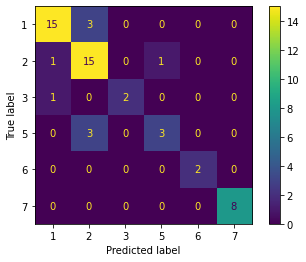

In [32]:
cm = confusion_matrix(y_test,y_pred)
print("------------Confusion matrix------------")

plot_confusion_matrix(model2,x_test,y_test)
plt.show()

****Logistic Regression****

In [21]:
model3 = LogisticRegression()
model3.fit(x_train,y_train)

LogisticRegression()

Classification Report

In [22]:
y_pred = model3.predict(x_test)
cr = classification_report(y_test,y_pred)
print(' ')
print("-------------------CLASSIFICATION REPORT of Logistic Regression--------------------")
print(cr)

 
-------------------CLASSIFICATION REPORT of Logistic Regression--------------------
              precision    recall  f1-score   support

           1       0.62      0.76      0.68        17
           2       0.55      0.57      0.56        21
           5       1.00      0.20      0.33         5
           6       0.00      0.00      0.00         3
           7       0.70      0.88      0.78         8

    accuracy                           0.61        54
   macro avg       0.57      0.48      0.47        54
weighted avg       0.60      0.61      0.58        54



C:\Users\Dilrose\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dilrose\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dilrose\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

In [56]:
# predictions on known data
print(new_features[0])
print(target.tail(0))
d = [[0.43283582,0.43759398,1.,0.25233645,0.35178571,0.00966184,0.30855019,0.,0.]]
result = model2.predict(d)
print("Prediction: ",types[str(result[0])])

[0.43283582 0.43759398 1.         0.25233645 0.35178571 0.00966184
 0.30855019 0.         0.        ]
Series([], Name: Glass_Type, dtype: int64)
Prediction:  building_windows_float_processed


In [95]:
data.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Glass_Type'], dtype='object')

In [57]:
# predictions on unknown data
ri = float(input("Enter refractive index(1.5112-1.5339): "))
na = float(input("Enter sodium's value(10.73-17.38): "))
mg = float(input("Enter magnesiums's value(0-4.49): "))
al = float(input("Enter aluminiums's value(0.29-3.5): "))
si = float(input("Enter silicons's value(69.81-75.41): "))
k = float(input("Enter potassium's value(0-6.29): "))
ca = float(input("Enter calcium's value(5.43-16.19): "))
ba = float(input("Enter barium's value(0-3.15): "))
fe = float(input("Enter iron's value(0-0.51): "))
d = [[ri,na,mg,al,si,k,ca,ba,fe]]
result = m1.predict(d)
print("Prediction: ",types[str(result[0])])

Prediction:  headlamps


*Save the Model*

In [162]:
with open('db.model', 'wb') as f:
	pickle.dump(model2,f)